### Imports and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

train_data = pd.read_csv('TrainTable.csv')
test_data = pd.read_csv('TestTable.csv')

In [2]:
train_data.head(3)

,head,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,action
0,"['48.0', '52.0', '1']","['25.333333333333332', '80.66666666666666', '1']","['68.0', '72.66666666666666', '0']","['36.0', '106.0', '1']","['83.33333333333333', '108.0', '1']","['64.66666666666666', '81.33333333333333', '1']","['81.33333333333333', '81.33333333333333', '1']","['36.0', '140.0', '1']","['67.33333333333333', '150.0', '1']","['48.666666666666664', '202.0', '1']","['67.33333333333333', '200.0', '1']","['28.0', '260.0', '1']","['69.33333333333333', '247.33333333333331', '1']",baseball_pitch
1,"['178.0', '38.0', '1']","['153.33333333333331', '62.0', '1']","['193.33333333333331', '61.33333333333333', '1']","['140.66666666666666', '94.0', '1']","['202.0', '94.66666666666666', '1']","['155.33333333333331', '80.66666666666666', '1']","['175.33333333333331', '77.33333333333333', '1']","['158.66666666666666', '112.66666666666666', '1']","['191.33333333333331', '119.33333333333333', '1']","['158.66666666666666', '171.33333333333331', '1']","['193.33333333333331', '172.66666666666666', '1']","['202.66666666666666', '219.33333333333331', '1']","['150.0', '215.33333333333331', '1']",baseball_pitch
2,"['192.0', '36.0', '1']","['176.0', '70.66666666666666', '0']","['205.33333333333331', '64.0', '1']","['168.0', '97.33333333333333', '1']","['192.66666666666666', '96.66666666666666', '1']","['142.66666666666666', '79.33333333333333', '0']","['162.66666666666666', '80.66666666666666', '1']","['171.33333333333331', '130.0', '0']","['203.33333333333331', '130.0', '1']","['177.33333333333331', '173.33333333333331', '0']","['201.33333333333331', '176.0', '1']","['190.66666666666666', '225.33333333333331', '0']","['214.66666666666666', '236.66666666666666', '1']",baseball_pitch


In [3]:
#extracting coordinates from array into their own columns

def extract_coordinates(data):
    coordinates = []
    for col in data.columns[:-1]:  
        data[col] = data[col].apply(eval)
        data[f'{col}_x'] = data[col].apply(lambda x: x[0] if len(x) > 0 else 0)
        data[f'{col}_y'] = data[col].apply(lambda x: x[1] if len(x) > 0 else 0)
        data[f'{col}_visible'] = data[col].apply(lambda x: x[2] if len(x) > 2 else 0)
        coordinates.extend([f'{col}_x', f'{col}_y', f'{col}_visible'])
    return data[coordinates]

In [4]:
X_train = extract_coordinates(train_data)
X_test = extract_coordinates(test_data)
X_train.head(3)

,head_x,head_y,head_visible,left_shoulder_x,left_shoulder_y,left_shoulder_visible,right_shoulder_x,right_shoulder_y,right_shoulder_visible,left_elbow_x,...,left_knee_visible,right_knee_x,right_knee_y,right_knee_visible,left_ankle_x,left_ankle_y,left_ankle_visible,right_ankle_x,right_ankle_y,right_ankle_visible
0,48.0,52.0,1,25.333333333333332,80.66666666666666,1,68.0,72.66666666666666,0,36.0,...,1,67.33333333333333,200.0,1,28.0,260.0,1,69.33333333333333,247.33333333333331,1
1,178.0,38.0,1,153.33333333333331,62.0,1,193.33333333333331,61.33333333333333,1,140.66666666666666,...,1,193.33333333333331,172.66666666666666,1,202.66666666666666,219.33333333333331,1,150.0,215.33333333333331,1
2,192.0,36.0,1,176.0,70.66666666666666,0,205.33333333333331,64.0,1,168.0,...,0,201.33333333333331,176.0,1,190.66666666666666,225.33333333333331,0,214.66666666666666,236.66666666666666,1


In [5]:
#action labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['action'])
y_test = label_encoder.transform(test_data['action'])

(array([125., 130., 105., 165.,  66., 124.,  62.,  84., 149., 158.,  75.,
        173.,  71., 118., 139.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <BarContainer object of 15 artists>)

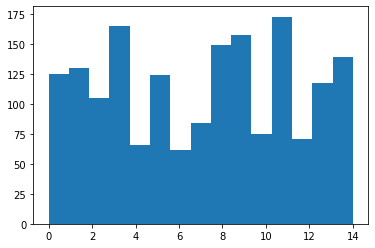

In [6]:
#label distribution
plt.hist(y_train, bins=15)

### Model 1. Training a base model on a random n_estimators at first just to see

In [7]:
#initialize and train the classifier
rf1 = RandomForestClassifier(n_estimators=400, random_state=37)
rf1.fit(X_train, y_train)

#make predictions
y_pred = rf1.predict(X_test)

#evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8213058419243986
Classification Report:
                 precision    recall  f1-score   support

 baseball_pitch       0.71      0.57      0.63        42
 baseball_swing       0.75      0.84      0.79        43
    bench_press       0.91      0.89      0.90        35
           bowl       0.91      0.93      0.92        55
 clean_and_jerk       0.89      0.77      0.83        22
     golf_swing       0.78      0.76      0.77        42
      jump_rope       0.83      0.75      0.79        20
  jumping_jacks       0.76      0.93      0.84        28
         pullup       0.92      0.92      0.92        50
         pushup       0.98      0.96      0.97        53
          situp       0.96      0.92      0.94        25
          squat       0.88      0.90      0.89        58
   strum_guitar       0.96      0.96      0.96        23
tennis_forehand       0.60      0.54      0.57        39
   tennis_serve       0.56      0.66      0.61        47

       accuracy                   

### Model 2. Optimal n_estimators for max accuracy

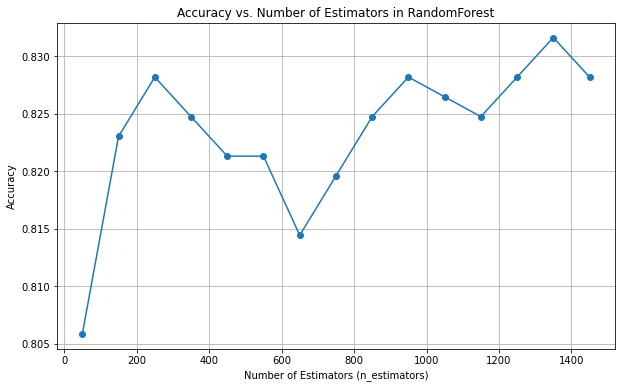

In [8]:
#define the range of n_estimators to test
n_estimators_range = range(50, 1550, 100)
accuracies = []
best_accuracy = 0
best_n = 0
best_y_pred = None #store best preditctions

for n in n_estimators_range:
    
    rf2 = RandomForestClassifier(n_estimators=n, random_state=37)
    rf2.fit(X_train, y_train)
    
    y_pred = rf2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    #check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n
        best_y_pred = y_pred


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators in RandomForest")
plt.grid()
plt.show()

In [9]:
#classification report for the best model
print(f"Best n_estimators: {best_n} with accuracy: {best_accuracy*100:.2f}%")
print("Classification Report for the best model:")
print(classification_report(y_test, best_y_pred, target_names=label_encoder.classes_))

Best n_estimators: 1350 with accuracy: 83.16%
Classification Report for the best model:
                 precision    recall  f1-score   support

 baseball_pitch       0.75      0.57      0.65        42
 baseball_swing       0.73      0.86      0.79        43
    bench_press       0.97      0.89      0.93        35
           bowl       0.91      0.93      0.92        55
 clean_and_jerk       0.95      0.82      0.88        22
     golf_swing       0.76      0.76      0.76        42
      jump_rope       0.83      0.75      0.79        20
  jumping_jacks       0.79      0.93      0.85        28
         pullup       0.96      0.94      0.95        50
         pushup       1.00      0.98      0.99        53
          situp       0.96      0.92      0.94        25
          squat       0.88      0.90      0.89        58
   strum_guitar       0.96      0.96      0.96        23
tennis_forehand       0.59      0.56      0.58        39
   tennis_serve       0.58      0.68      0.63        47

# Addressing class label imbalance in samples

### Model 3. Adding balance parameter

Cost-Sensitive Learning: Assigns higher penalties to misclassifications of minority classes

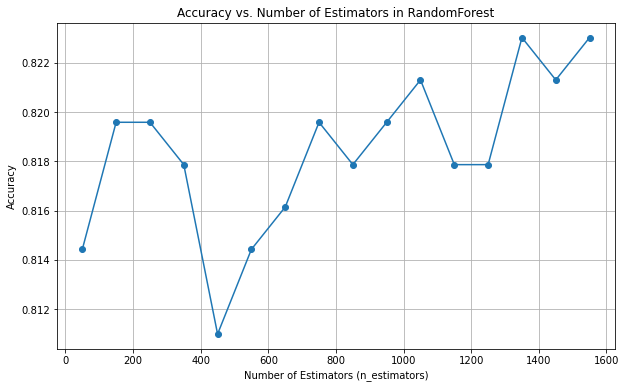

In [10]:
#define the range of n_estimators to test
n_estimators_range = range(50, 1650, 100)
accuracies = []
best_accuracy = 0
best_n = 0
best_y_pred = None #store best preditctions

for n in n_estimators_range:
    
    rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=37, n_estimators=n)
    rf_balanced.fit(X_train, y_train)

    #make predictions
    y_pred = rf_balanced.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    #check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n
        best_y_pred = y_pred


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators in RandomForest")
plt.grid()
plt.show()

In [11]:
#classification report for the best n model
print(f"Best n_estimators: {best_n} with accuracy: {best_accuracy*100:.2f}%")
print("Classification Report for the best model:")
print(classification_report(y_test, best_y_pred, target_names=label_encoder.classes_))

Best n_estimators: 1350 with accuracy: 82.30%
Classification Report for the best model:
                 precision    recall  f1-score   support

 baseball_pitch       0.68      0.55      0.61        42
 baseball_swing       0.71      0.86      0.78        43
    bench_press       0.97      0.89      0.93        35
           bowl       0.88      0.96      0.92        55
 clean_and_jerk       0.94      0.77      0.85        22
     golf_swing       0.78      0.74      0.76        42
      jump_rope       0.82      0.70      0.76        20
  jumping_jacks       0.83      0.89      0.86        28
         pullup       0.96      0.94      0.95        50
         pushup       0.91      0.98      0.95        53
          situp       0.96      0.88      0.92        25
          squat       0.89      0.88      0.89        58
   strum_guitar       0.96      0.96      0.96        23
tennis_forehand       0.63      0.56      0.59        39
   tennis_serve       0.58      0.68      0.63        47

# Feature Importance Analysis

### Model 2 has best accuracy at 83.16%, so we'll do the analysis on that model

                   Feature  Importance
16            left_wrist_y    0.077970
19           right_wrist_y    0.068598
1                   head_y    0.059048
7         right_shoulder_y    0.043791
4          left_shoulder_y    0.038343
31            right_knee_y    0.037947
37           right_ankle_y    0.036915
13           right_elbow_y    0.036180
34            left_ankle_y    0.035690
28             left_knee_y    0.035404
10            left_elbow_y    0.034959
18           right_wrist_x    0.033715
22              left_hip_y    0.032405
15            left_wrist_x    0.031114
25             right_hip_y    0.030467
36           right_ankle_x    0.028992
33            left_ankle_x    0.028551
9             left_elbow_x    0.026064
6         right_shoulder_x    0.024850
0                   head_x    0.024317
27             left_knee_x    0.024275
3          left_shoulder_x    0.023848
30            right_knee_x    0.023470
12           right_elbow_x    0.022927
21              left_hip_

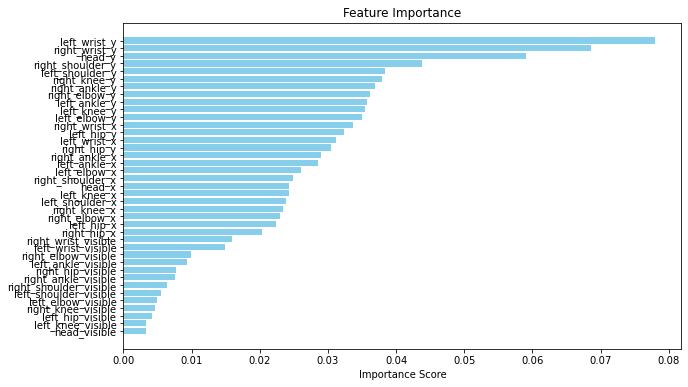

In [12]:
feature_importances = rf2.feature_importances_

feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [13]:
from sklearn.feature_selection import SelectFromModel

# select features 
selector = SelectFromModel(rf2, threshold='median') 
selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['head_x', 'head_y', 'left_shoulder_y', 'right_shoulder_x',
       'right_shoulder_y', 'left_elbow_x', 'left_elbow_y', 'right_elbow_y',
       'left_wrist_x', 'left_wrist_y', 'right_wrist_x', 'right_wrist_y',
       'left_hip_y', 'right_hip_y', 'left_knee_y', 'right_knee_y',
       'left_ankle_x', 'left_ankle_y', 'right_ankle_x', 'right_ankle_y'],
      dtype='object')


In [14]:
# new RandomForestClassifier based on the selected features
rf_selected = RandomForestClassifier(n_estimators=1350, random_state=37)
rf_selected.fit(X_train_selected, y_train)

y_pred = rf_selected.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Selected Features:", accuracy)


Accuracy with Selected Features: 0.8058419243986255


### Training with selected features did not improve accuracy beyond the initital model. However, this makes sense in the context of the problem because you realistically need the information of as many joints as possible for better activity classification. Also, none of the features had particularly high importance so this doesnt really support dropping any of them.

# Random CV search

In [15]:
# parameter distribution
param_dist = {
    'n_estimators': [300,600,900,1200,1500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#initialize random search
random_search = RandomizedSearchCV(estimator=rf2, param_distributions=param_dist, 
                                   n_iter=30, cv=3, n_jobs=-1, scoring='accuracy', verbose=1, random_state=37)

random_search.fit(X_train, y_train)

# get best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# evaluate the best model on the test set
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best Score: 0.7276390786513752
Test Accuracy: 0.8213


Accuracy not improved over model 2. 

# Confustion Matrix

In [16]:
#Best Model
rf2 = RandomForestClassifier(n_estimators=1350, random_state=37)
rf2.fit(X_train, y_train)
    
y_pred = rf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

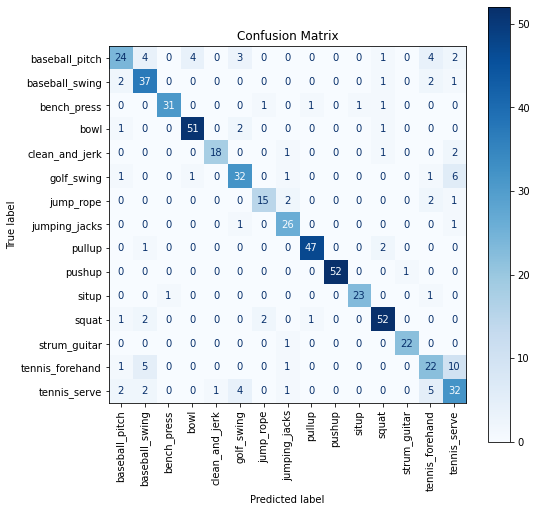

                 precision    recall  f1-score   support

 baseball_pitch       0.75      0.57      0.65        42
 baseball_swing       0.73      0.86      0.79        43
    bench_press       0.97      0.89      0.93        35
           bowl       0.91      0.93      0.92        55
 clean_and_jerk       0.95      0.82      0.88        22
     golf_swing       0.76      0.76      0.76        42
      jump_rope       0.83      0.75      0.79        20
  jumping_jacks       0.79      0.93      0.85        28
         pullup       0.96      0.94      0.95        50
         pushup       1.00      0.98      0.99        53
          situp       0.96      0.92      0.94        25
          squat       0.88      0.90      0.89        58
   strum_guitar       0.96      0.96      0.96        23
tennis_forehand       0.59      0.56      0.58        39
   tennis_serve       0.58      0.68      0.63        47

       accuracy                           0.83       582
      macro avg       0.84   

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

fig, ax = plt.subplots(figsize=(8, 8))  
disp.plot(cmap='Blues', ax=ax)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

# classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f"Accuracy: {accuracy*100:.2f}%")